# LINEAR REGRESSION ASSIGNMENT


## 1. Data Understanding and Exploration

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [4]:
# Importing the required libraries

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [5]:
# reading data from day.csv file.

BoomBikes_data = pd.read_csv('day.csv')
BoomBikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# viewing dimension of data frame

BoomBikes_data.shape

(730, 16)

In [7]:
# viewing columns of data frame with their data type

BoomBikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# viewing numerical variables of data frame

BoomBikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# creating variable list

varlist =  ['season']

# converting in categorical variable

BoomBikes_data[varlist] = BoomBikes_data[varlist].apply(lambda x: x.map({1:'spring' , 2:'summer' , 3:'fall' , 4:'winter'}))


In [10]:
BoomBikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# data count on the basis of season
BoomBikes_data['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# creating variable list

varlist =  ['mnth']

# converting in categorical variable    
    
BoomBikes_data[varlist] = BoomBikes_data[varlist].apply(lambda x: x.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}))


In [13]:
BoomBikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# data count on the basis of month
BoomBikes_data['mnth'].astype('category').value_counts()

August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: mnth, dtype: int64

In [15]:
# creating variable list

varlist =  ['weekday']

# converting in categorical variable    
    
BoomBikes_data[varlist] = BoomBikes_data[varlist].apply(lambda x: x.map({0:'Sunday' , 1:'Monday', 2:'Tuesday', 3:'Wednessday', 4:'Thursday', 5:'Friday', 6:'Saturday'}))



In [16]:
# data count on the basis of weekday
BoomBikes_data['weekday'].astype('category').value_counts()

Monday        105
Saturday      105
Sunday        105
Friday        104
Thursday      104
Tuesday       104
Wednessday    103
Name: weekday, dtype: int64

In [17]:
BoomBikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Wednessday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
# creating variable list

varlist =  ['weathersit']

# converting in categorical variable    
    
BoomBikes_data[varlist] = BoomBikes_data[varlist].apply(lambda x: x.map({1:'Clear & Few clouds', 2:'Mist & Cloudy', 3:'Light Snow and Light Rain', 4:'Heavy Rain'}))


In [19]:
BoomBikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Monday,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Tuesday,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Wednessday,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# dropping not required columns like instant and dteday

BoomBikes_data.drop(['instant','dteday'],axis=1, inplace=True)


In [21]:
BoomBikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Monday,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Tuesday,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Wednessday,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Visualising the Data

### Visualising Numeric Variables by Pair Plot

<Figure size 2000x1500 with 0 Axes>

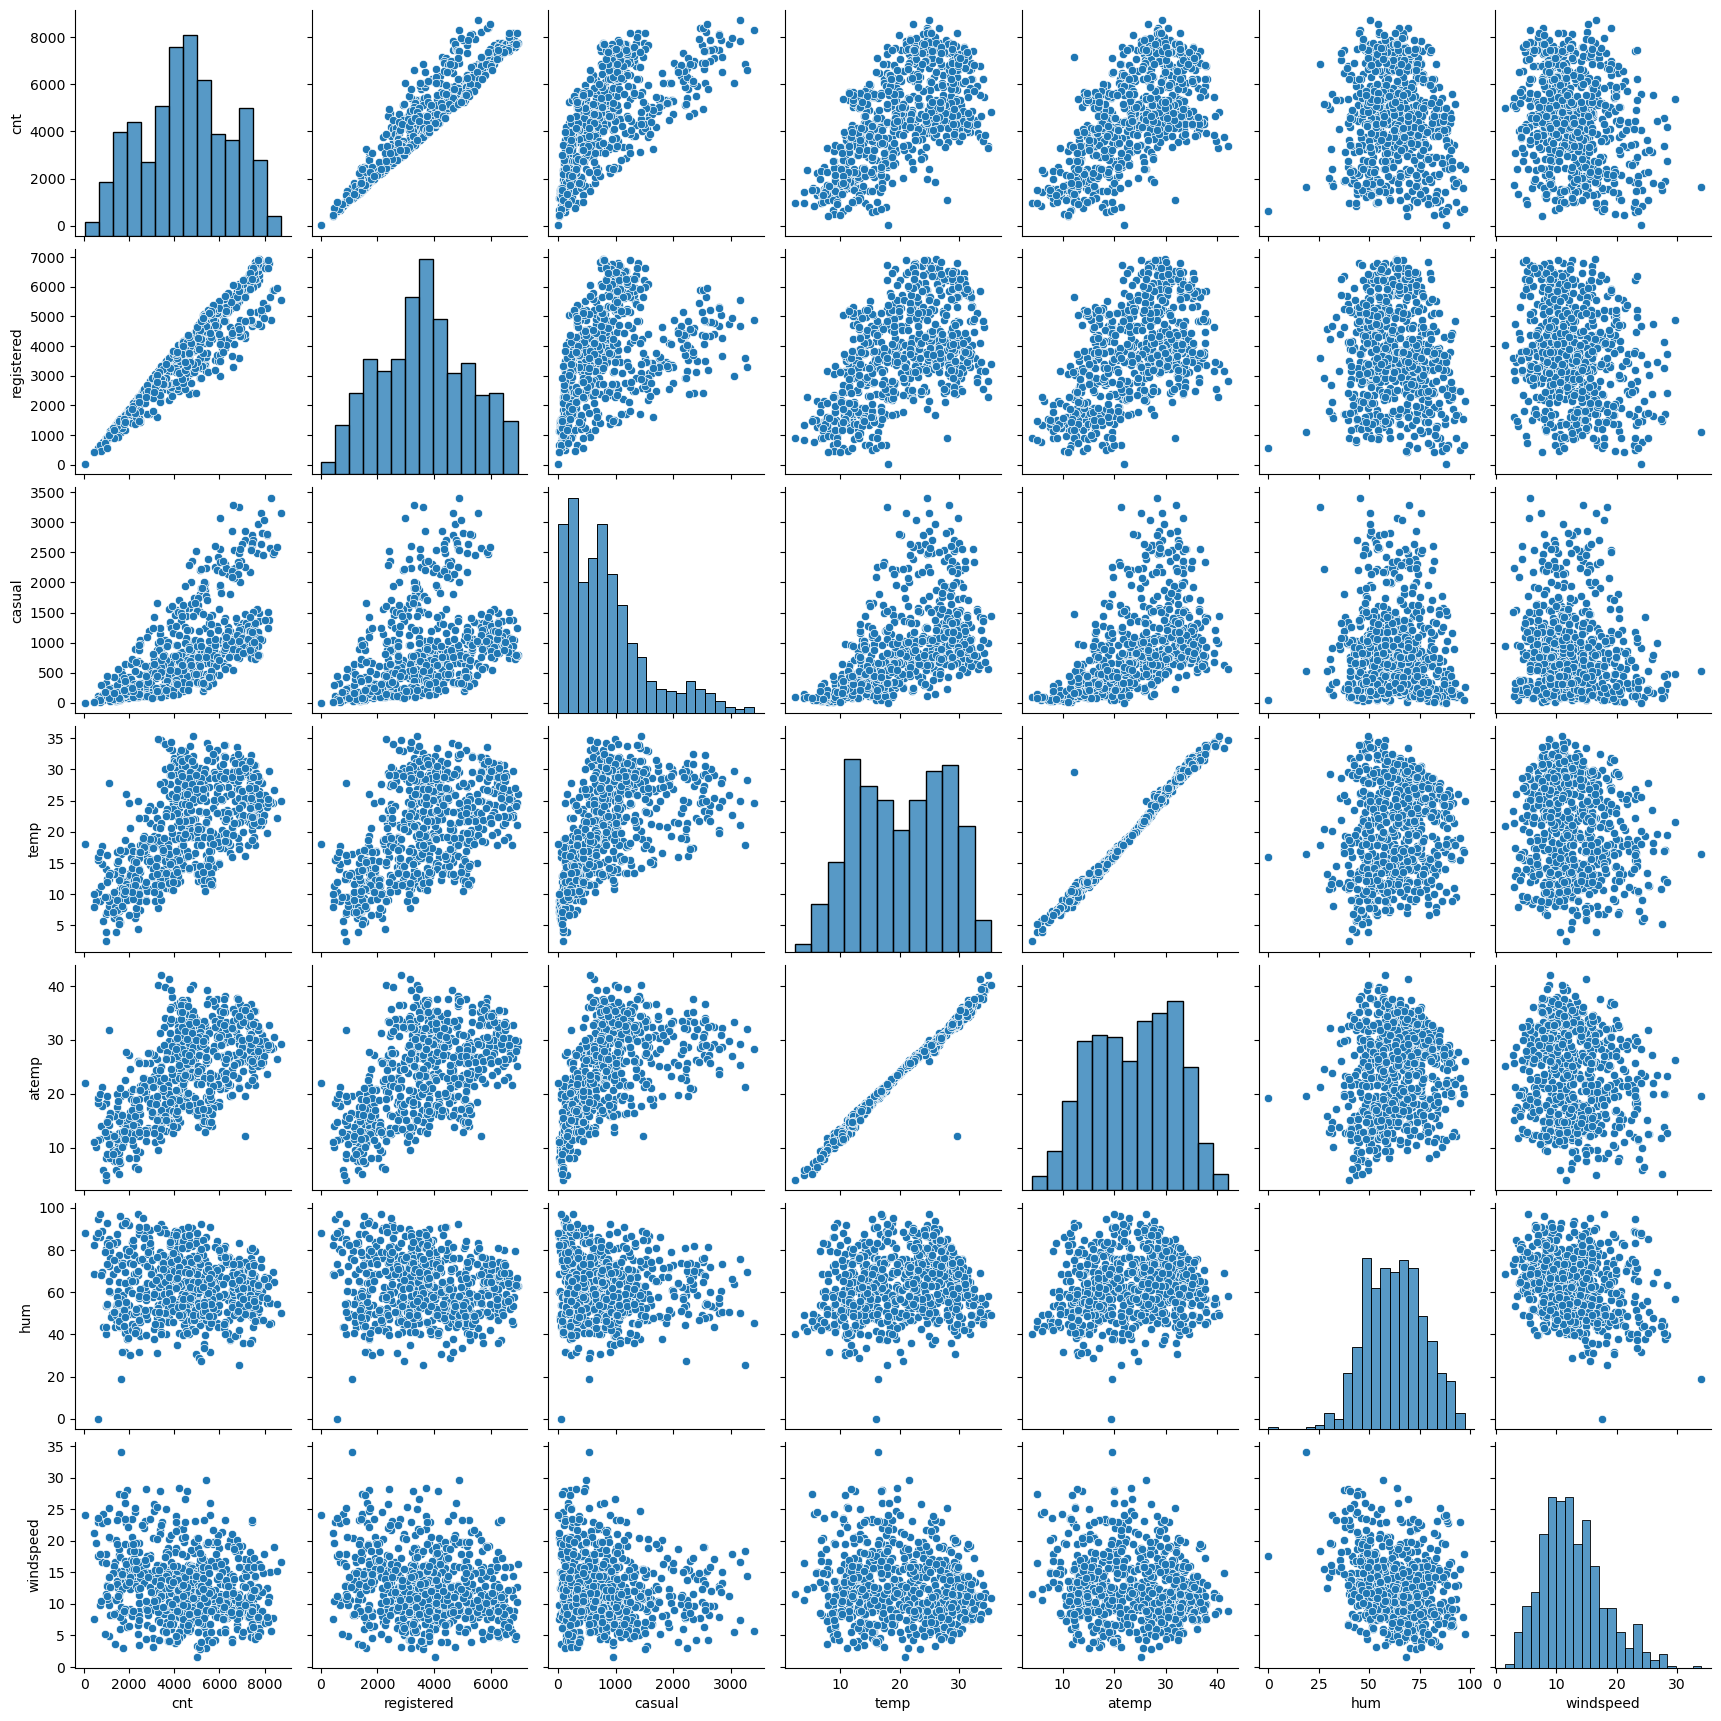

In [22]:
plt.figure(figsize = (20, 15))
sns.pairplot(BoomBikes_data[['cnt', 'registered', 'casual', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

### FROM ABOVE GRAPH WE CAN SAY:

- cnt and registered variables are highly collinear in nature.
- casual and cnt variables have less collinearity than collinearity of cnt and registered variables.
- atemp and temp variables are highly collinear in nature.

## Visualising Variables

In [23]:
cont_col = ["temp","atemp","hum","windspeed","cnt"]
cat_col = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

### EDA on Continuous Variable: 

In [24]:
def plot_box_and_dist(col):
    sns.boxplot(BoomBikes_data[col])
    plt.title("Boxplot for "+col)
    plt.show()
    sns.distplot(BoomBikes_data[col]) #distribution plot
    plt.title("Density Histogram for "+col)
    plt.show()
    print(BoomBikes_data[col].describe()) #Data metrics for the column selected

   

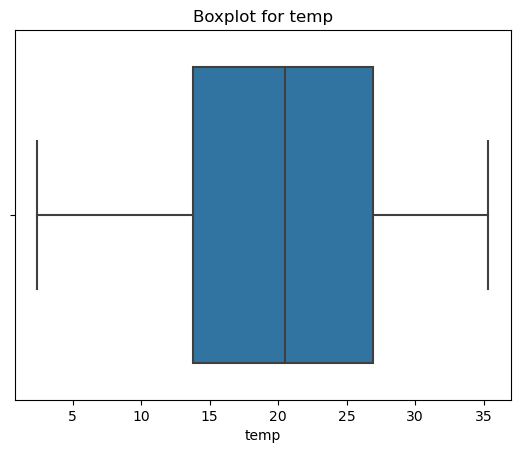

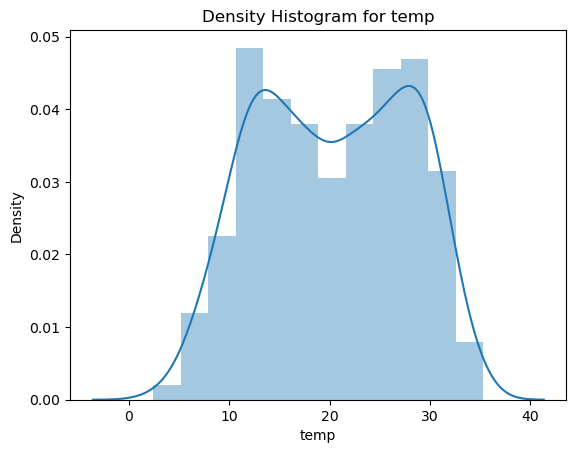

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


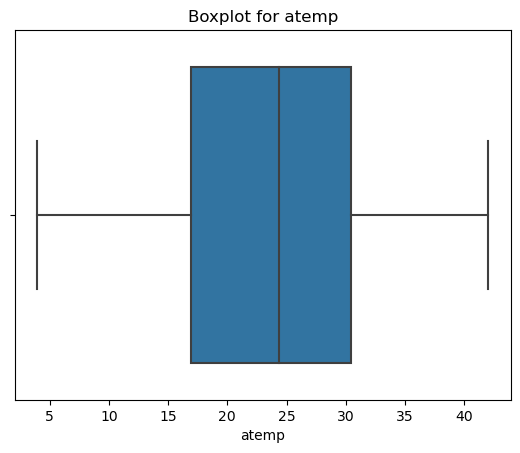

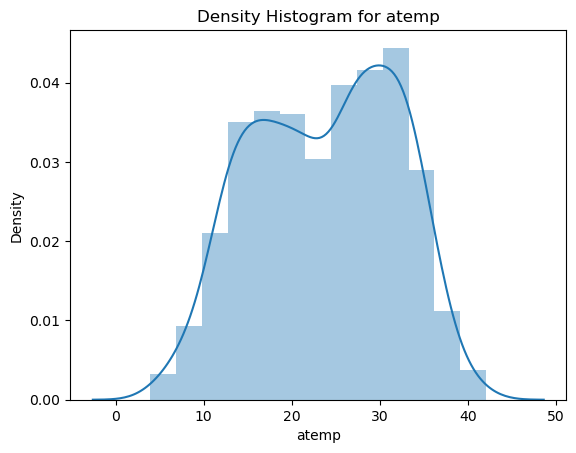

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


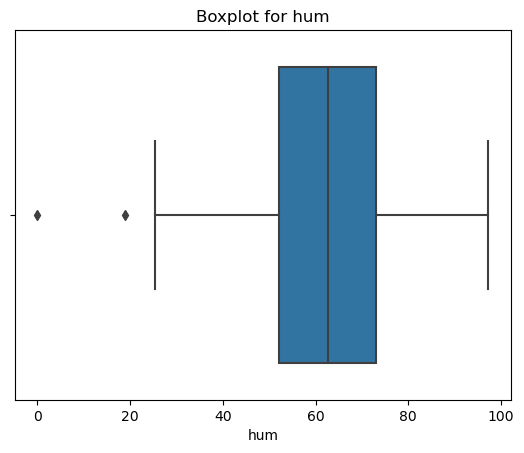

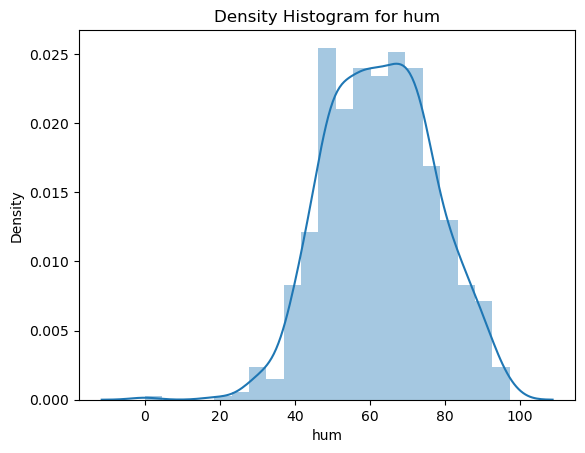

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


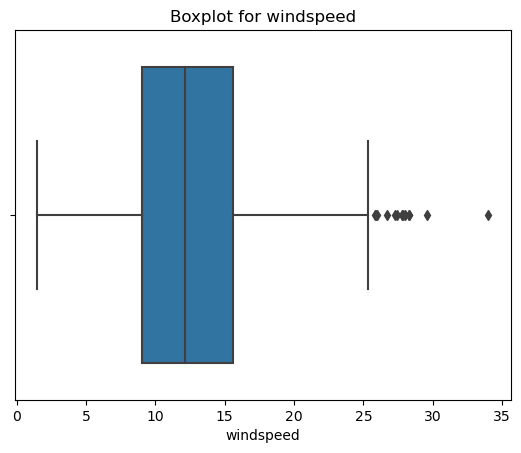

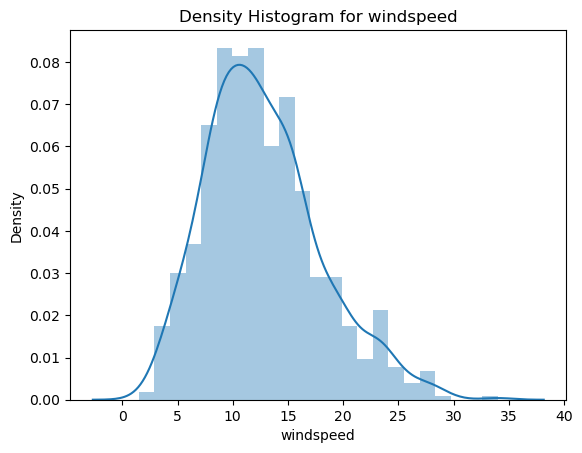

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


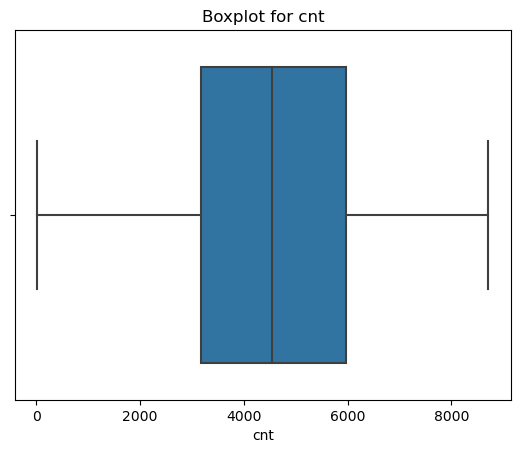

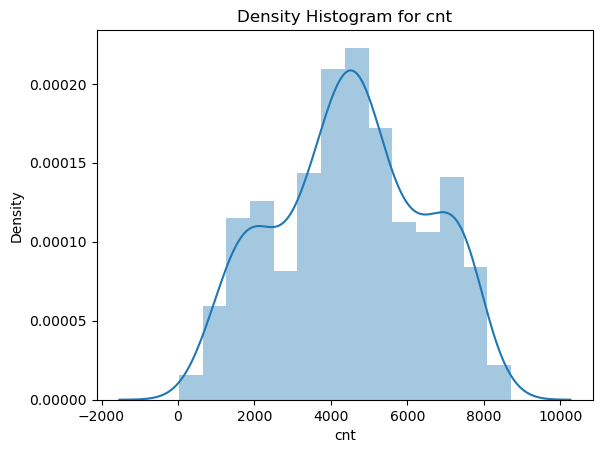

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


In [25]:
for col in cont_col:
    plot_box_and_dist(col)

#### CNT : Average demand for the bike is ~4508 per day

#### DTEDAY : Does not have much affect on the demand

#### TEMP : 20-40degress temperature have a higher average rental bike per day than overall average rental
#### 20-40 have a higher average rental bike per day than 0-20

#### ATEMP : 25-40degress temperature have a higher average rental bike per day than overall average rental
#### 25-40 degress temperature have a higher average rental bike per day than 0-25

#### HUM : 20-30 humidity levels have a higher average rental bike per day than overall average rental
#### 20-30 humidity levels have a higher average rental bike per day than other levels

#### WINDSPEED : 0-10 windspeed levels have a higher average rental bike per day than overall average rental
#### 0-10 windspeed levels have a higher average rental bike per day than other level


### Visualising Categorical Variables

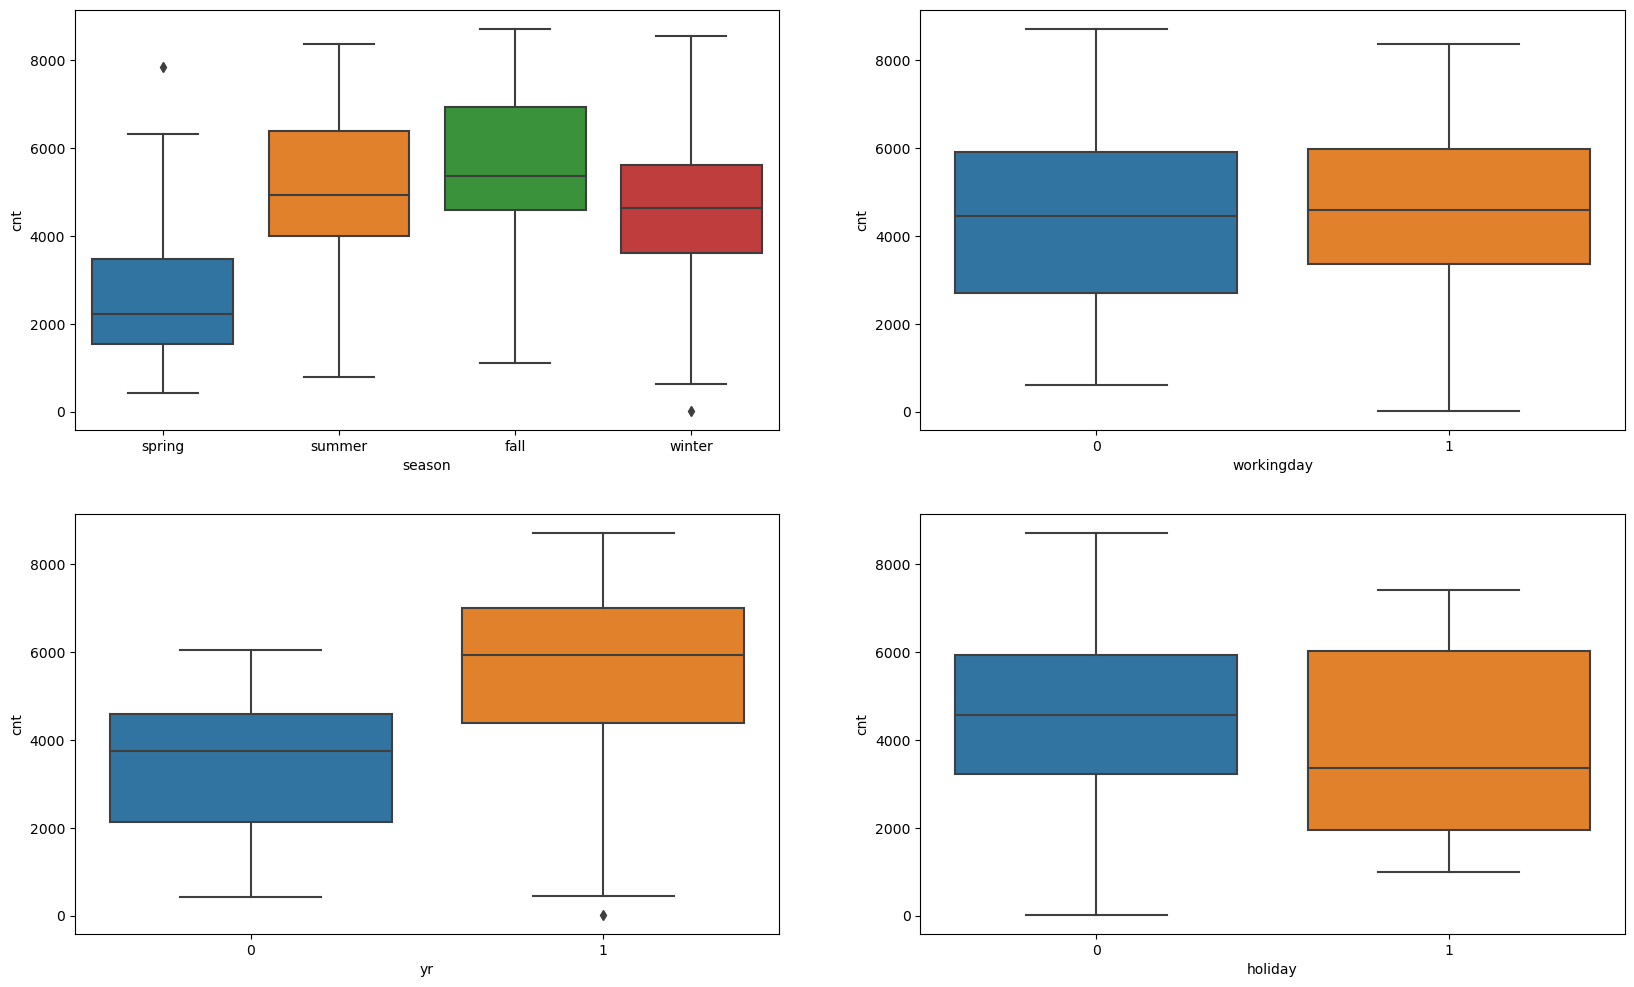

In [26]:
# creating box plot.

plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = BoomBikes_data)

plt.subplot(2,2,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = BoomBikes_data)

plt.subplot(2,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = BoomBikes_data)

plt.subplot(2,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BoomBikes_data)

plt.show()

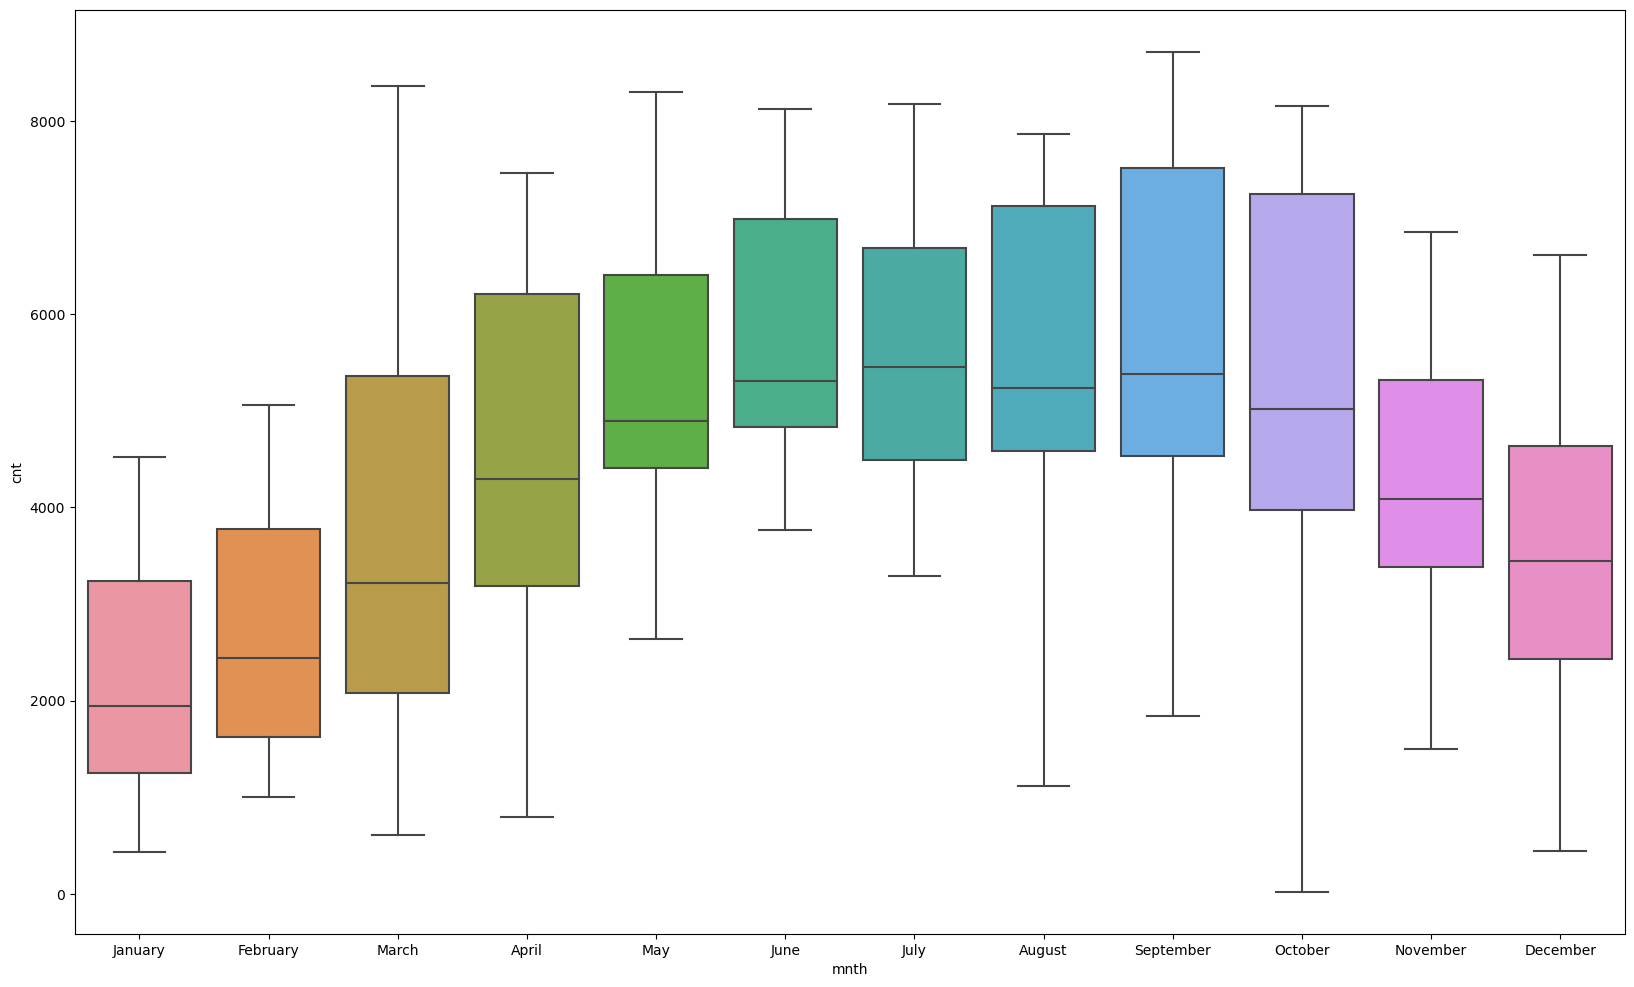

In [27]:
# boxplot for mnth variable.

plt.figure(figsize=(20, 12))
sns.boxplot(x = 'mnth', y = 'cnt', data = BoomBikes_data)
plt.show()

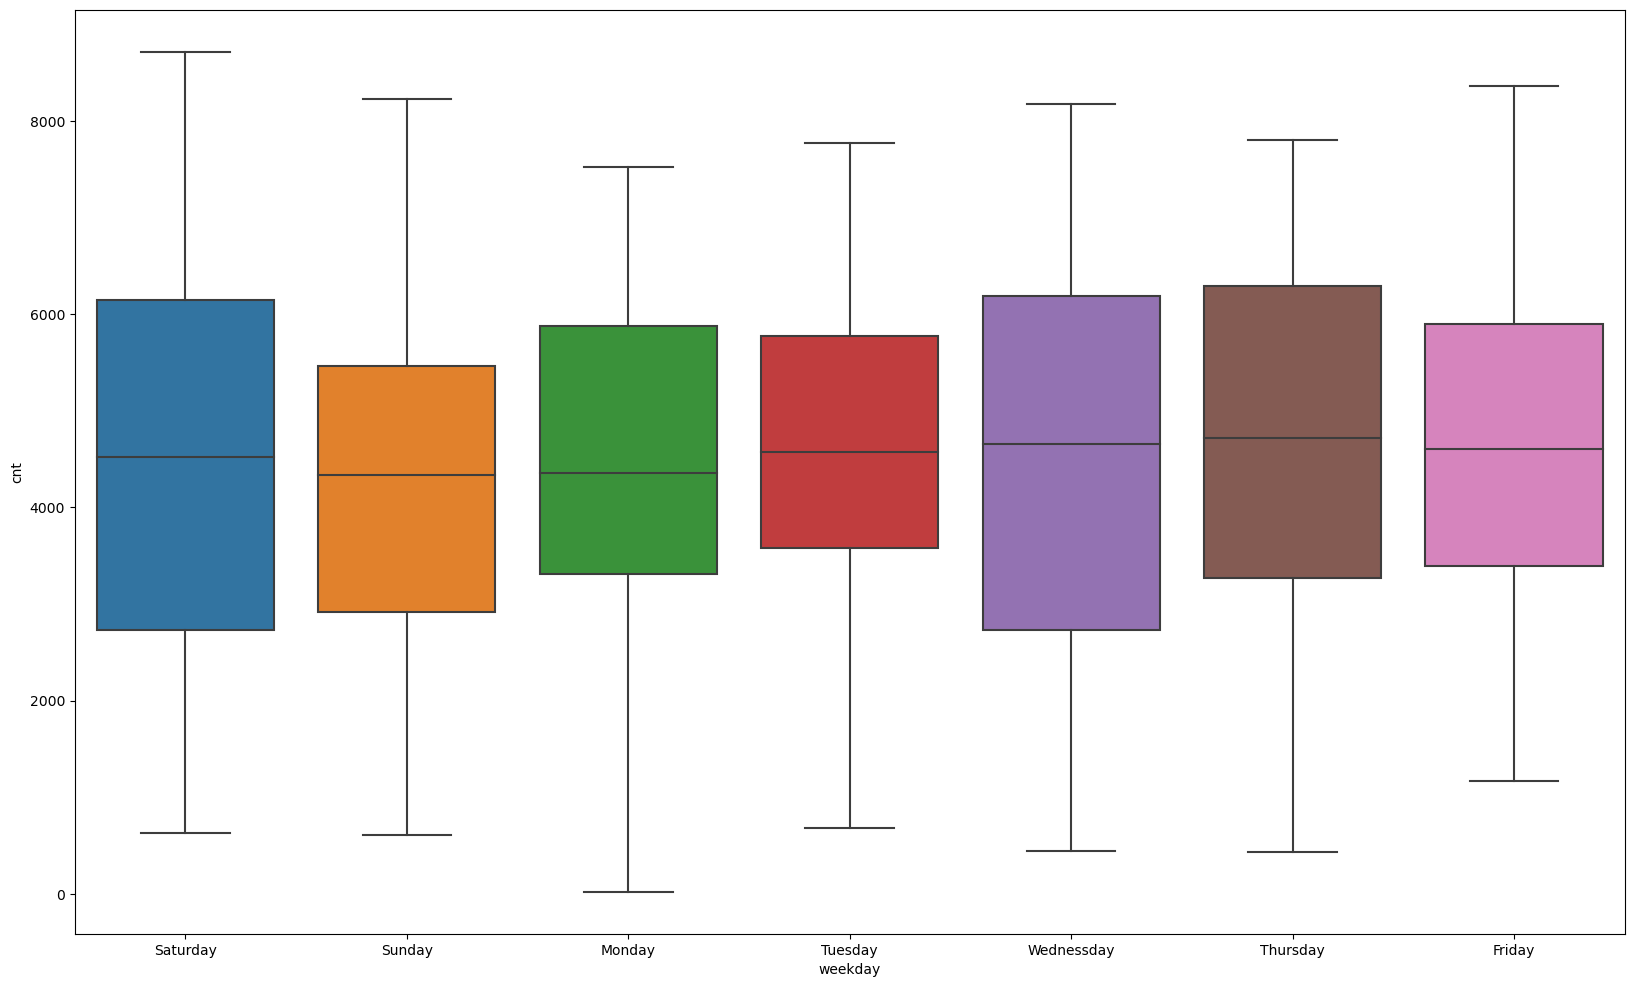

In [28]:
# boxplot for weekday variable.

plt.figure(figsize=(20, 12))
sns.boxplot(x = 'weekday', y = 'cnt', data = BoomBikes_data)
plt.show()

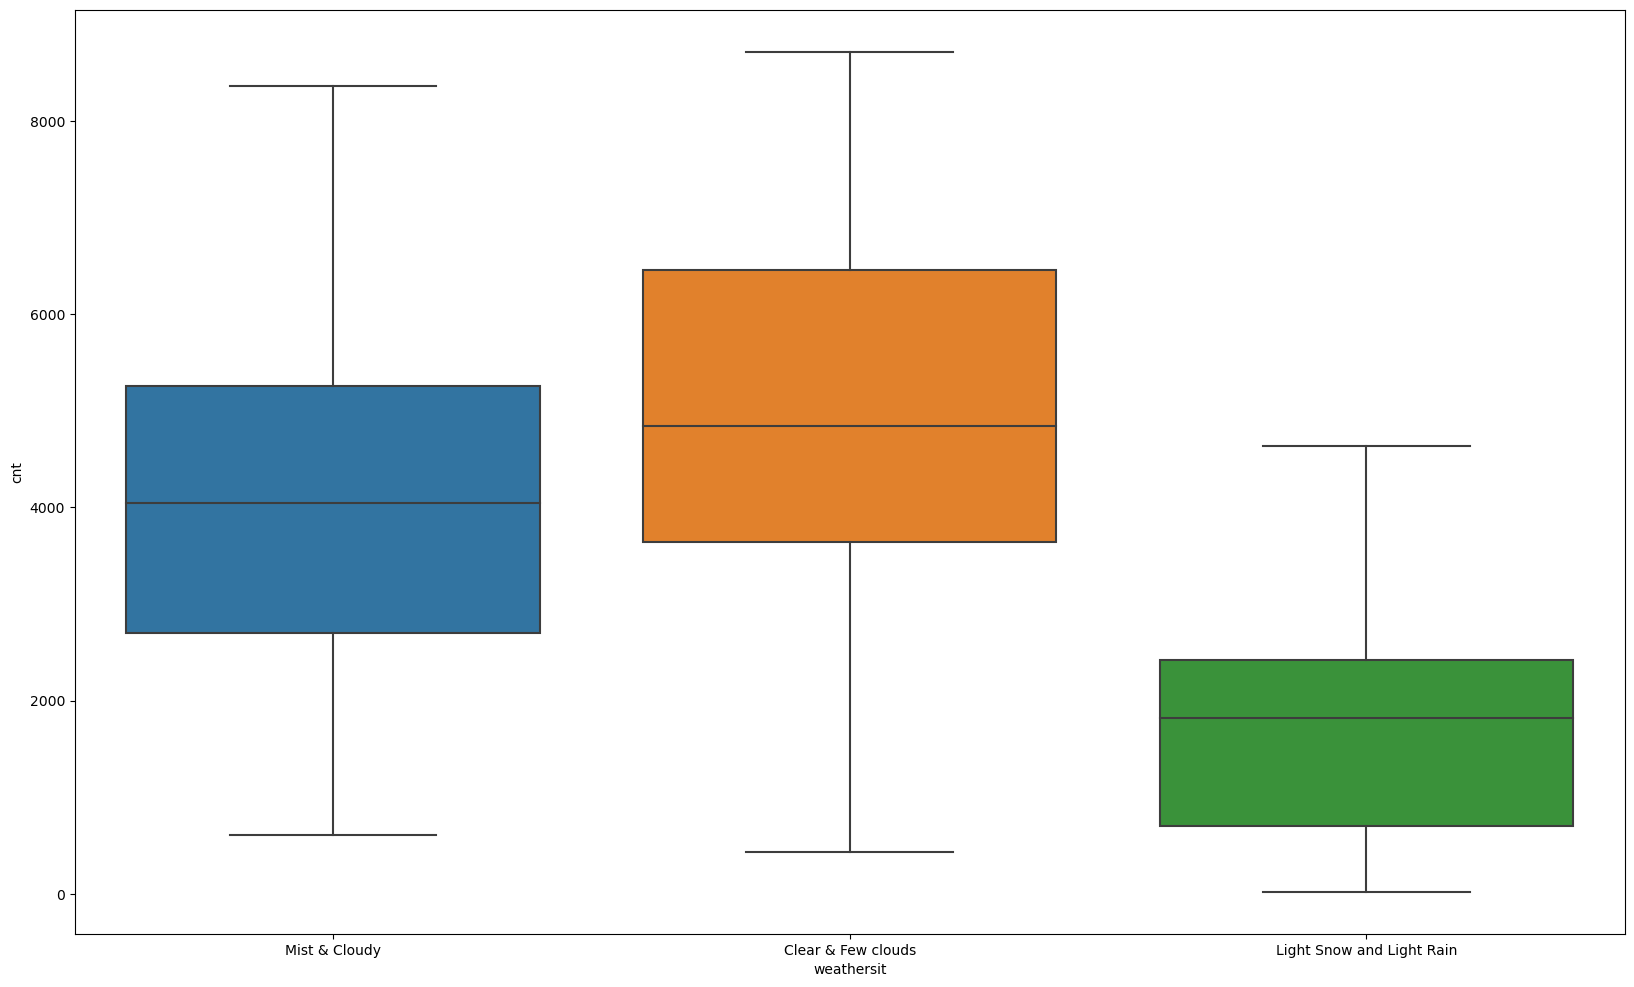

In [29]:
# boxplot for weathersit variable.

plt.figure(figsize=(20, 12))
sns.boxplot(x = 'weathersit', y = 'cnt', data = BoomBikes_data)
plt.show()

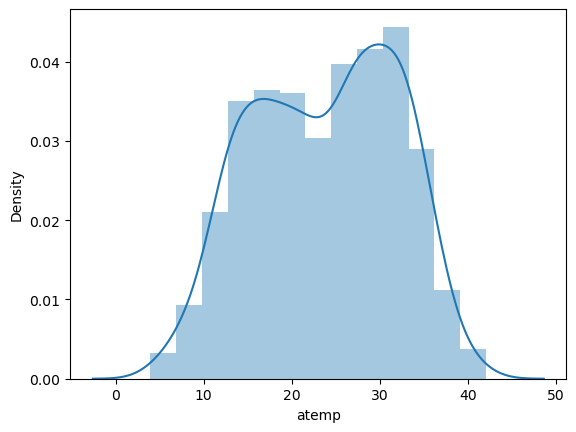

In [30]:
# displot for temperature
sns.distplot(BoomBikes_data['atemp'])
plt.show()

## FROM ABOVE GRAPH WE CAN SAY:

#### SEASON : Fall, Summer and Winter have a higher average rental bike per day than overall average rental

#### Fall and Summer have a higher average rental bike per day than Winter and Spring

#### YR : 2019 year have a higher average rental bike per day than overall average rental
#### 2019 year have a higher average rental bike per day than 2018 year

#### MNTH : 6,9,8,7,5 and 10 months have a higher average rental bike per day than overall average rental
#### 6,9,8,7,5 and 10 have a higher average rental bike per day than 4,11,3,12,2,1

#### HOLIDAY : Non Holidays have a higher average rental bike per day than overall average rental
#### 3Non Holidays have a higher average rental bike per day than Holidays

#### WEEKDAY : Weekday 2,3,4,5,6 have a higher average rental bike per day than overall average rental
#### Weekday 2,3,4,5,6 have a higher average rental bike per day than Weekday 1,2

#### WORKINGDAY : Working day have a higher average rental bike per day than overall average rental
#### Working day have a higher average rental bike per day than Non Working Day

#### WEATHERSIT : Clear, Few clouds, Partly cloudy, Partly cloudy Weather have a higher average rental bike per day than overall ###3 average rental

#### Clear, Few clouds, Partly cloudy, Partly cloudy Weather have a higher average rental bike per day than Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#  Data Preparation:

### Dummy Variables:


In [31]:
# Getting the dummy variables for the feature 'season' and store it in a new variable - 'Season'

Season = pd.get_dummies(BoomBikes_data['season'])

In [32]:
# Check what the dataset 'season' looks like

Season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. we can drop the `fall` column, as the type of season can be identified with just the last three columns where:-

- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`
 

In [33]:
# dropping the first column from Season data frame using 'drop_first = True'

Season = pd.get_dummies(BoomBikes_data['season'], drop_first = True)


In [34]:
# Adding the results to the BoomBikes_data dataframe.

BoomBikes_data = pd.concat([BoomBikes_data, Season], axis = 1)


In [35]:
BoomBikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,January,0,Monday,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,January,0,Tuesday,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,January,0,Wednessday,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [36]:
# Dropping 'season' as we have created the dummies for it.

BoomBikes_data.drop(['season'], axis = 1, inplace = True)


In [37]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'

month = pd.get_dummies(BoomBikes_data['mnth'])
month.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


Now, we don't need 12 columns. we can drop the `April` column, as this type of month can be identified with last 11 columns where:-

- `00000000000` will correspond to `April`
- `10000000000` will correspond to `August`
- `01000000000` will correspond to `December`
- `00100000000` will correspond to `February`
- `00010000000` will correspond to `January`
- `00001000000` will correspond to `July`
- `00000100000` will correspond to `June`
- `00000010000` will correspond to `March`
- `00000001000` will correspond to `May`
- `00000000100` will correspond to `November`
- `00000000010` will correspond to `October`
- `00000000001` will correspond to `September`

In [38]:
# dropping April column

month.drop(['April'],axis=1, inplace=True)


In [39]:
# Adding the results to the BoomBikes_data dataframe.

BoomBikes_data = pd.concat([BoomBikes_data, month], axis = 1)

BoomBikes_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Monday,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Tuesday,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Wednessday,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [40]:
# Dropping 'mnth' as we have created the dummies for it.

BoomBikes_data.drop(['mnth'], axis = 1, inplace = True)

BoomBikes_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednessday,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekdays'

weekdays = pd.get_dummies(BoomBikes_data['weekday'])
weekdays.head()


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


Now, we don't need 7 columns. we can drop the `Friday` column, as this type of weekday can be identified with last 6 columns where:-

- `0000000` will correspond to `Friday`
- `1000000` will correspond to `Monday`
- `0100000` will correspond to `Saturday`
- `0010000` will correspond to `Sunday`
- `0001000` will correspond to `Thursday`
- `0000100` will correspond to `Tuesday`
- `0000010` will correspond to `Wednessday`

In [42]:
# dropping Friday column

weekdays.drop(['Friday'],axis=1, inplace=True)
weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [43]:
# Adding the results to the BoomBikes_data dataframe.

BoomBikes_data = pd.concat([BoomBikes_data, weekdays], axis = 1)

BoomBikes_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday
0,0,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednessday,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Dropping 'weekday' as we have created the dummies for it.

BoomBikes_data.drop(['weekday'], axis = 1, inplace = True)

BoomBikes_data.head()


,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday
0,0,0,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'

weather = pd.get_dummies(BoomBikes_data['weathersit'])
weather.head()

,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


the type of weather can be identified with these 3 columns:-

- `000` will correspond to `Heavy Rain`
- `100` will correspond to `Clear & Few clouds`
- `010` will correspond to `Light Snow and Light Rain`
- `001` will correspond to `Mist & Cloudy`

In [46]:
# Adding the results to the BoomBikes_data dataframe.

BoomBikes_data = pd.concat([BoomBikes_data, weather], axis = 1)

BoomBikes_data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
0,0,0,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,Clear & Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,Clear & Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,Clear & Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,1,1,0,0


In [47]:
# Dropping 'weathersit' as we have created the dummies for it.

BoomBikes_data.drop(['weathersit'], axis = 1, inplace = True)

BoomBikes_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,1,1,0,0


# Model Building

### Splitting the Data into Training and Testing Sets

In [48]:
# creating traing set and testing set

np.random.seed(0)
df_train, df_test = train_test_split(BoomBikes_data, train_size = 0.7, test_size = 0.3, random_state = 100)


In [49]:
print("Training set's shape",df_train.shape)
print("Test set's shape",df_test.shape)

Training set's shape (510, 33)
Test set's shape (219, 33)


# Rescaling the Features:

#### - temp = temperature in Celsius
#### - atemp = Feeling temperature in Celsius
#### - hum = humidity
#### - windspeed = wind speed
#### - casual = count of casual users
#### - registered = count of registered users
#### - cnt = count of total rented bikes that is -> registered + casual

In [50]:
# creating an object

scaler = MinMaxScaler()

In [51]:
# Applying scaler to all above mentioned the columns.

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [52]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,1,0,0,0,0,0,0,1


In [53]:
# from describe() we can check all columns has maximum value 1 and minimum value as 0

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


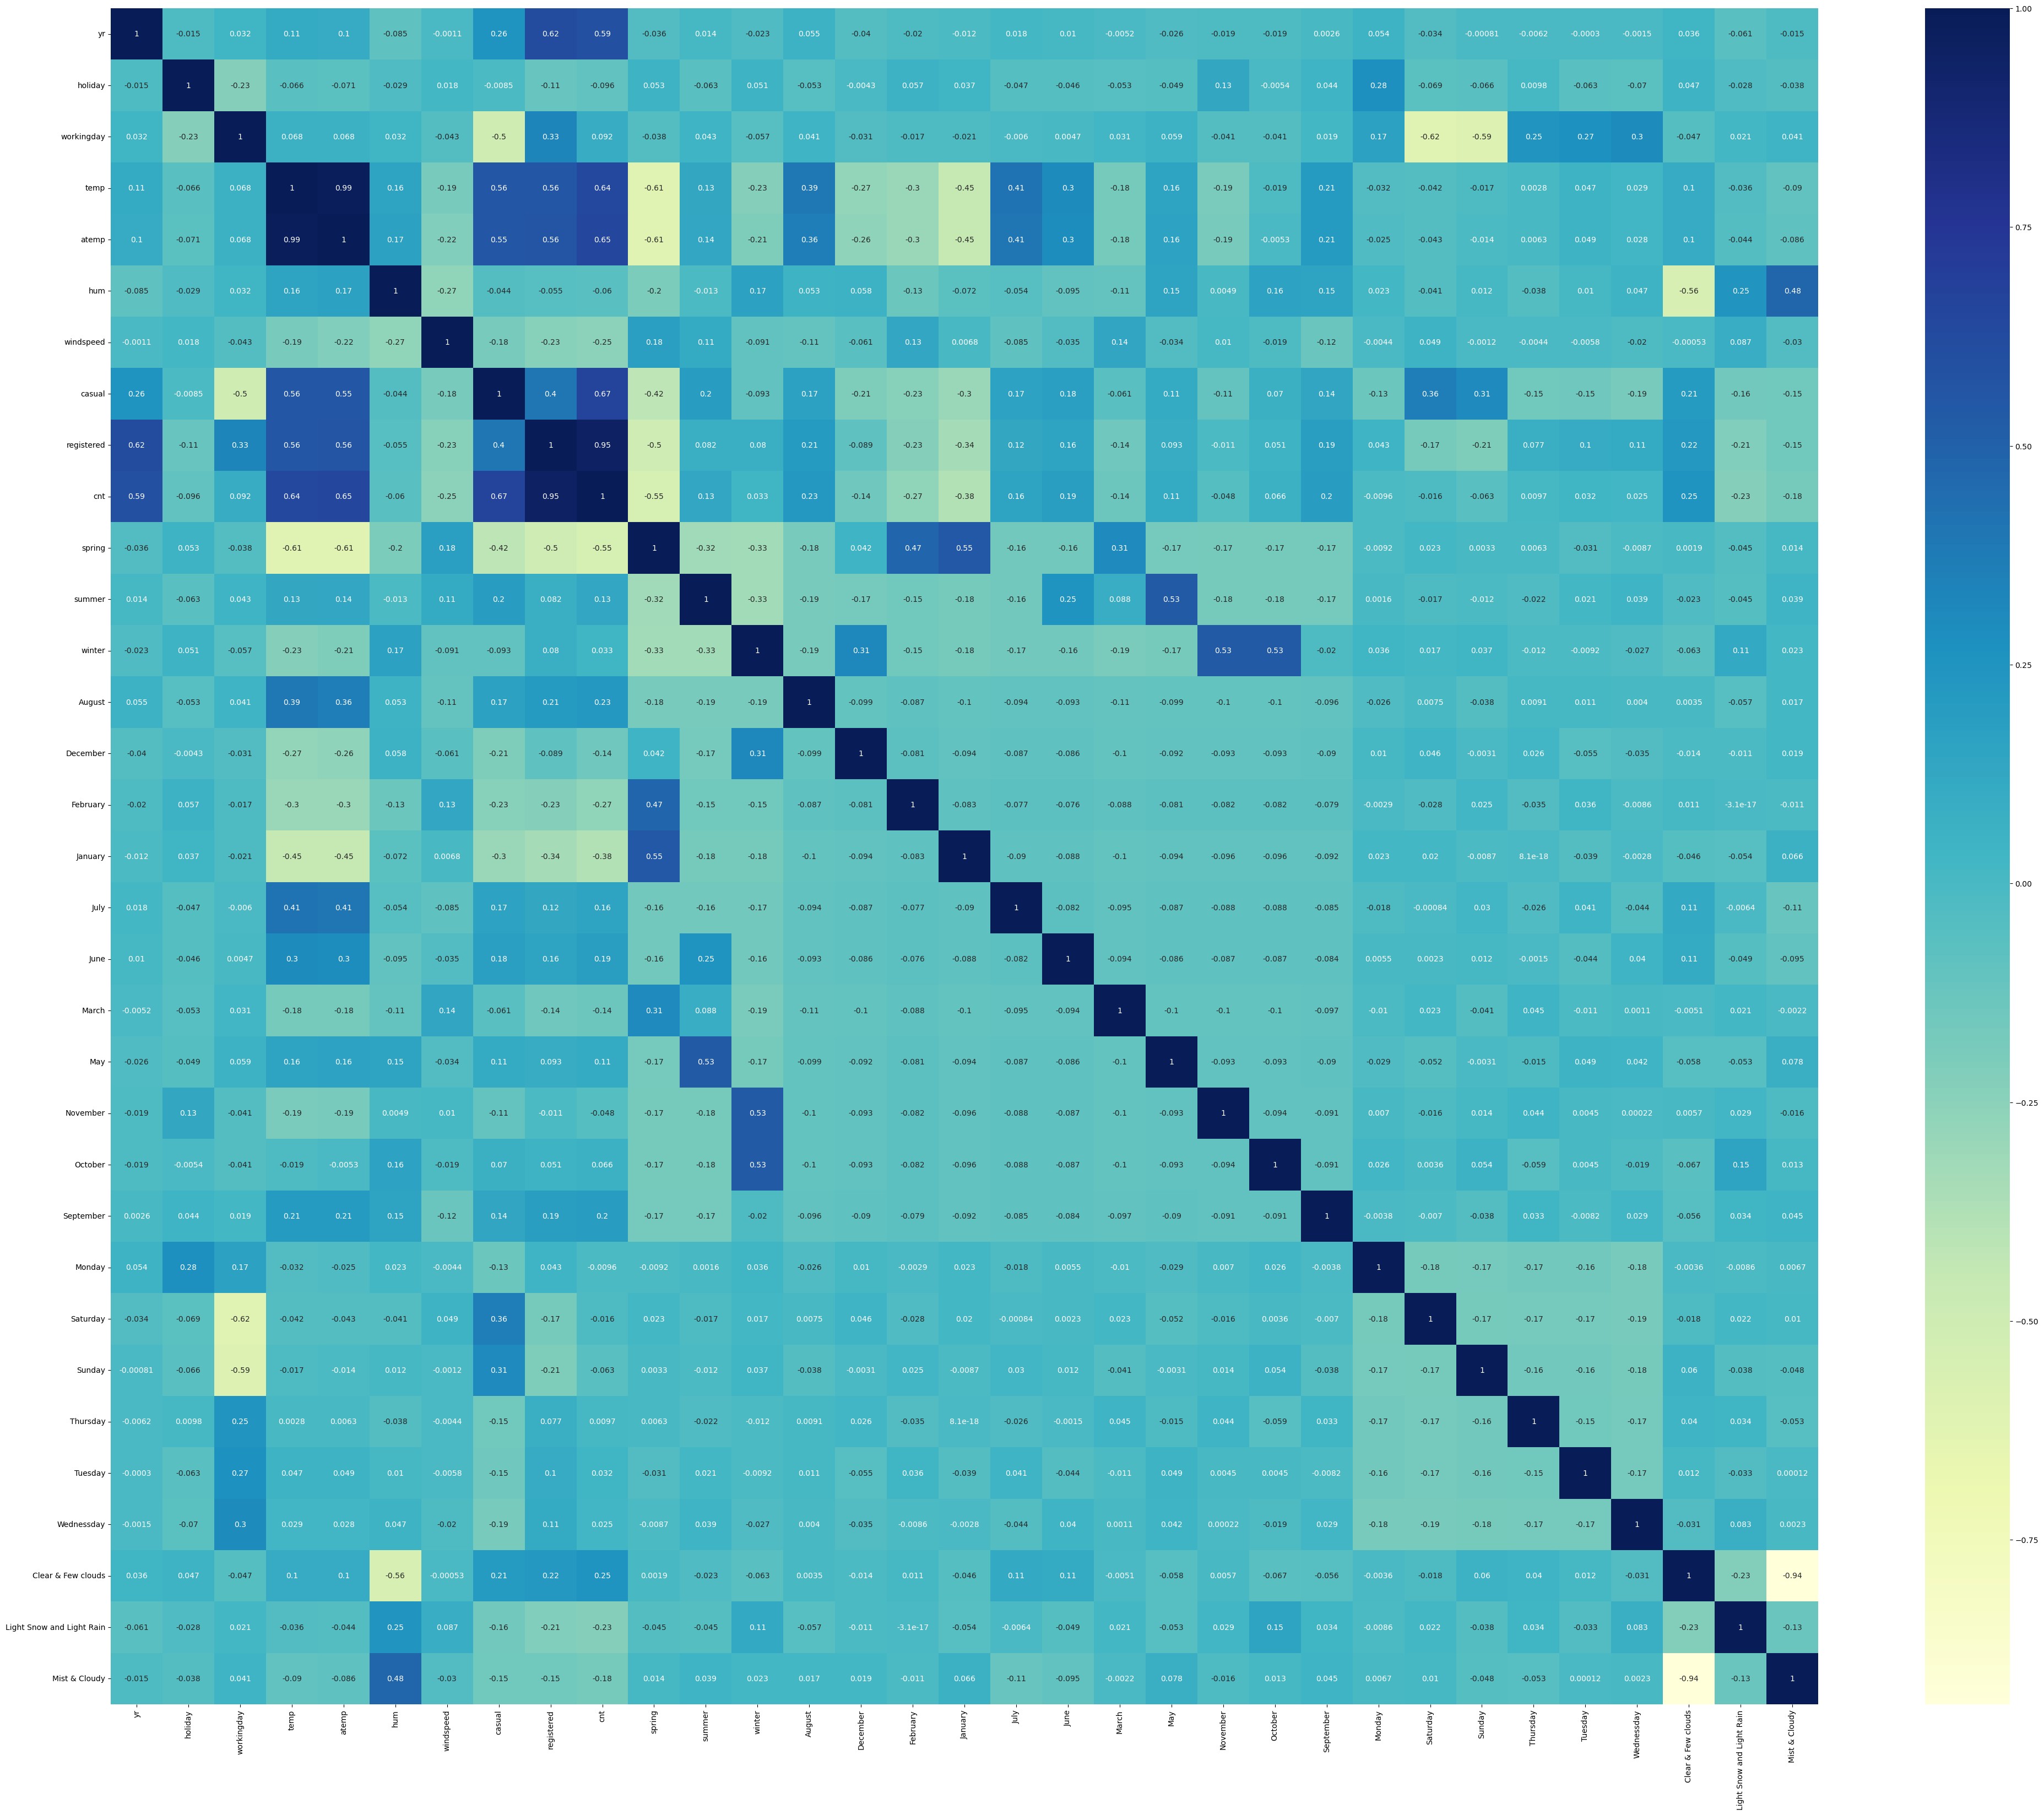

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated.

#CREATING heat-map

plt.figure(figsize = (50, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## FROM ABOVE HEAT MAP WE CAN OBSERVE

- COLUMNS like registered,casual, atemp, temp and yr are highly correlated with cnt Variable.

- temp and atemp are also highly correlated with each other.


### registered variable most highly correlated with cnt variable 

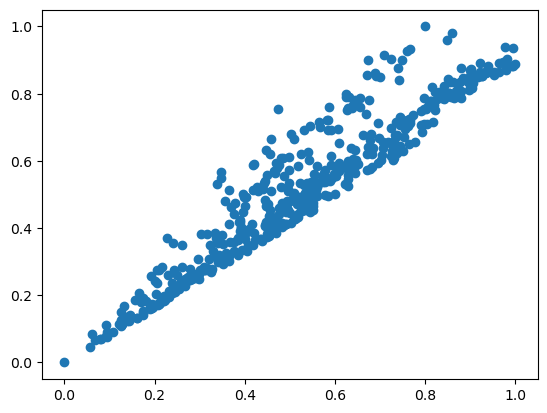

In [55]:
# creating scatter plot for cnt vs registered

plt.scatter(df_train.registered, df_train.cnt)
plt.show()

In [56]:
# Register is highly co-related with cnt. 

### Dividing into X and Y sets for the model building

In [57]:
y_train = df_train.pop('cnt')
X_train = df_train

In [60]:
# Dropping 'casual' becouse it is highly co-related with registered
X_train = X_train.drop(["casual","registered"],axis=1) 

In [61]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [62]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


# Building a linear model:

## RFE

 RECURSIVE FEATURE ELIMINATION

In [63]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [64]:
# columns supported by RFE
#lets select the Top 18 columns based on the RFE rank
#col = X_train.columns[rfe.ranking_<=15]
#col
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'August', 'July', 'June', 'November', 'Saturday', 'Clear & Few clouds',
       'Light Snow and Light Rain', 'Mist & Cloudy'],
      dtype='object')

In [65]:
X_train_new=X_train[col]
X_train_new

,yr,workingday,temp,hum,windspeed,spring,winter,August,July,June,November,Saturday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
653,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0.605840,0.355596,0,0,0,0,1,0,0,0,0,1
578,1,1,0.863973,0.679690,0.187140,0,0,1,0,0,0,0,1,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,1,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,1,0,0,1


In [66]:
# columns not supported by RFE

X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'summer', 'December', 'February', 'January',
       'March', 'May', 'October', 'September', 'Monday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednessday'],
      dtype='object')

## Building model using statsmodel, for the detialed statistics

In [67]:
#lets create a custom method to create a linear regresion model which prints the statistics and the VIF values and returns the model
def linearRegression(X_train,y_train):
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train)

    #Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    #Let's see the summary of our linear model
    print(lm.summary())
    
    print("*********************************************************\n")
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_rfe.drop("const",axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return X_train_rfe,lm

In [68]:
#Lets create the first model with all columns
myModel = linearRegression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        15:31:14   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [69]:
#lets create a model with the top 15 columns selected by RFE
myModel = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.67e-190
Time:                        15:31:19   Log-Likelihood:                 513.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     495   BIC:                            -933.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### We would drop 1st "Clear & Few clouds" variable as it has high P-value

In [71]:
X_train_new = X_train_new.drop(['Clear & Few clouds'], axis=1)
myModel = linearRegression(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.67e-190
Time:                        15:32:37   Log-Likelihood:                 513.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     495   BIC:                            -933.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "hum" variable as it has high VIF value

In [72]:

X_train_new = X_train_new.drop(['hum'], axis=1)
myModel = linearRegression(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.50e-187
Time:                        15:32:56   Log-Likelihood:                 503.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     496   BIC:                            -919.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "temp" variable as it has high VIF

In [73]:
X_train_new = X_train_new.drop(['temp'], axis=1)
myModel = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.21e-147
Time:                        15:33:05   Log-Likelihood:                 407.10
No. Observations:                 510   AIC:                            -788.2
Df Residuals:                     497   BIC:                            -733.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we will drop "winter" variable as it has high p-value

In [74]:
X_train_new = X_train_new.drop(['winter'], axis=1)
myModel = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.25e-148
Time:                        15:33:40   Log-Likelihood:                 406.86
No. Observations:                 510   AIC:                            -789.7
Df Residuals:                     498   BIC:                            -738.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "july" variable as it has high p-value 

In [76]:
X_train_new = X_train_new.drop(['July'], axis=1)
myModel = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.65e-149
Time:                        15:35:03   Log-Likelihood:                 405.48
No. Observations:                 510   AIC:                            -789.0
Df Residuals:                     499   BIC:                            -742.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "windspeed" variable as it has high VIF 

In [77]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)
myModel = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.71e-142
Time:                        15:35:13   Log-Likelihood:                 386.87
No. Observations:                 510   AIC:                            -753.7
Df Residuals:                     500   BIC:                            -711.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "workingday" variable as it has high VIF 

In [78]:
X_train_new = X_train_new.drop(['workingday'], axis=1)
myModel = linearRegression(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     175.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.80e-140
Time:                        15:36:16   Log-Likelihood:                 378.85
No. Observations:                 510   AIC:                            -739.7
Df Residuals:                     501   BIC:                            -701.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "Saturday" variable as it has high P-value

In [80]:
X_train_new = X_train_new.drop(['Saturday'], axis=1)
myModel = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     200.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.43e-141
Time:                        15:37:25   Log-Likelihood:                 378.52
No. Observations:                 510   AIC:                            -741.0
Df Residuals:                     502   BIC:                            -707.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now, we would drop "june" variable as it has high Pvalue 

In [82]:
X_train_new = X_train_new.drop(['June'], axis=1)
X_train_final,lm = linearRegression(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.80e-140
Time:                        15:39:10   Log-Likelihood:                 374.65
No. Observations:                 510   AIC:                            -735.3
Df Residuals:                     503   BIC:                            -705.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
X_train_final

,const,yr,spring,August,November,Light Snow and Light Rain,Mist & Cloudy
653,1.0,1,0,0,0,0,0
576,1.0,1,0,0,0,0,0
426,1.0,1,1,0,0,0,1
728,1.0,1,1,0,0,0,0
482,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
526,1.0,1,0,0,0,0,1
578,1.0,1,0,1,0,0,0
53,1.0,0,1,0,0,0,0
350,1.0,0,0,0,0,0,1


In [84]:
#lets have look at the coefficents of the model for different features
lm.params.sort_values()

Light Snow and Light Rain   -0.310657
spring                      -0.284583
November                    -0.097024
Mist & Cloudy               -0.090778
August                       0.056657
yr                           0.246033
const                        0.501079
dtype: float64

#### January,February,winter,December,const,October have indirect dependency with the target variable "cnt"

#### Sunday,Saturday,registered have indirect dependency with the target variable "cnt"


In [85]:
#lets create a equation for the model
print("cnt = ",end='')
for index in lm.params.index:
    print(index,"*",round(lm.params[index],3),end=' + ')
print(0)

cnt = const * 0.501 + yr * 0.246 + spring * -0.285 + August * 0.057 + November * -0.097 + Light Snow and Light Rain * -0.311 + Mist & Cloudy * -0.091 + 0


In [86]:
#lets sort the coefficents of the model
abs(lm.params).sort_values()

August                       0.056657
Mist & Cloudy                0.090778
November                     0.097024
yr                           0.246033
spring                       0.284583
Light Snow and Light Rain    0.310657
const                        0.501079
dtype: float64

# Residual Analysis

## Assumption of Normally Distributed Error Terms

Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_pred = lm.predict(X_train_final)
y_train_pred

653    0.747113
576    0.747113
426    0.371752
728    0.462530
482    0.656335
         ...   
526    0.656335
578    0.803770
53     0.216496
350    0.410302
79     0.410302
Length: 510, dtype: float64

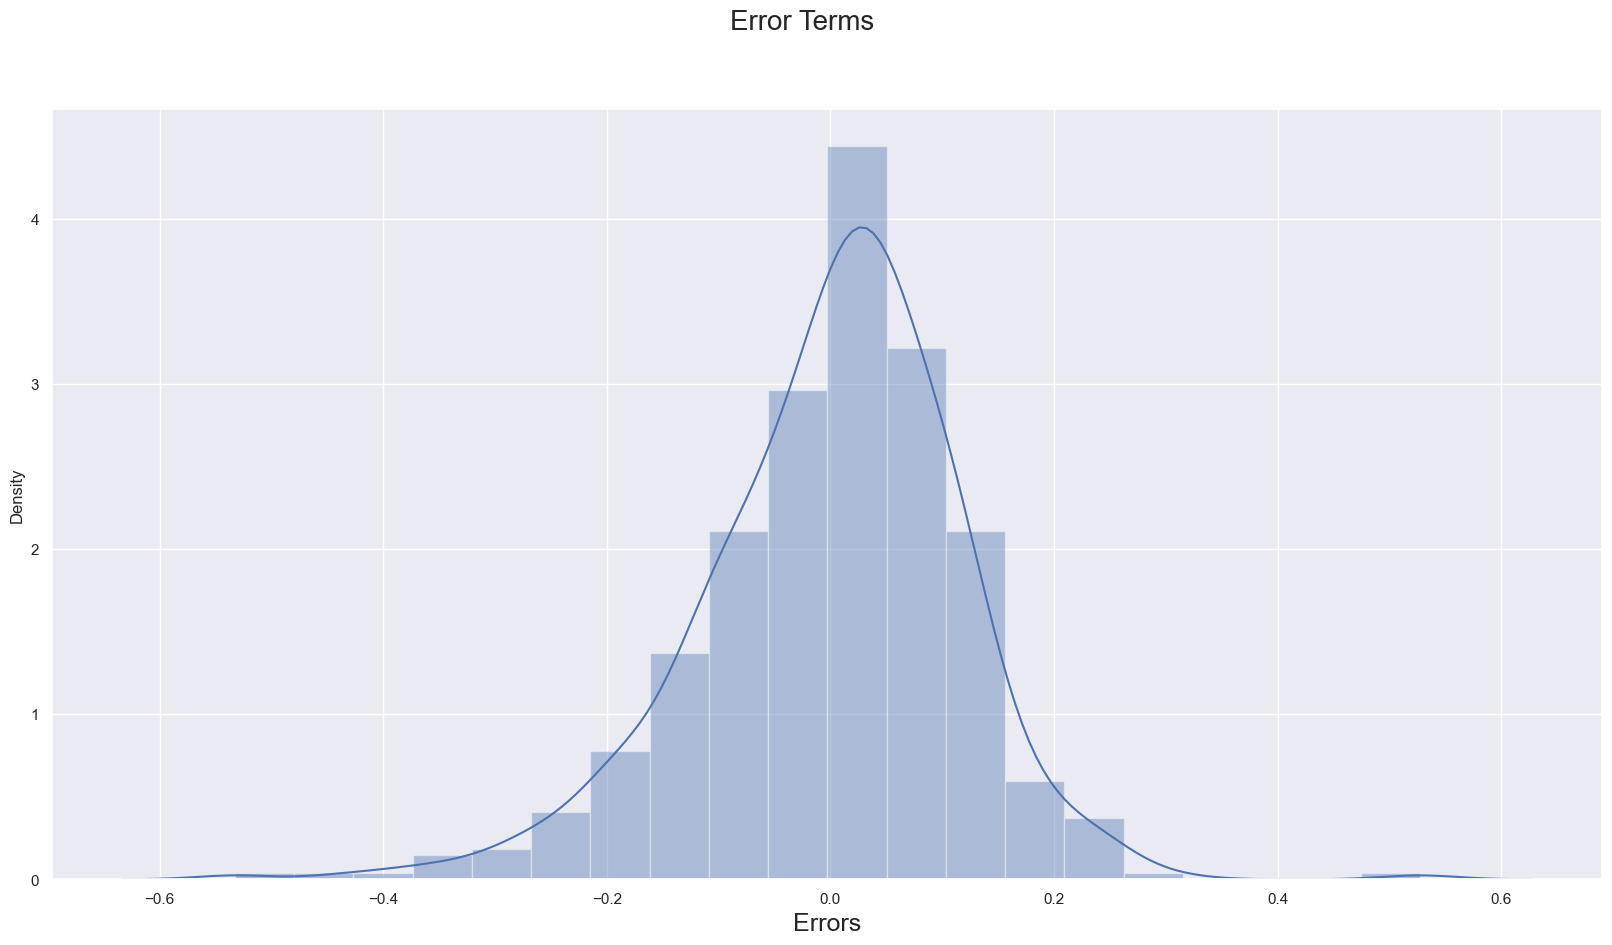

In [88]:
# Plot the histogram of the error terms
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()# X-label

## Assumption of Error Terms Being Independent

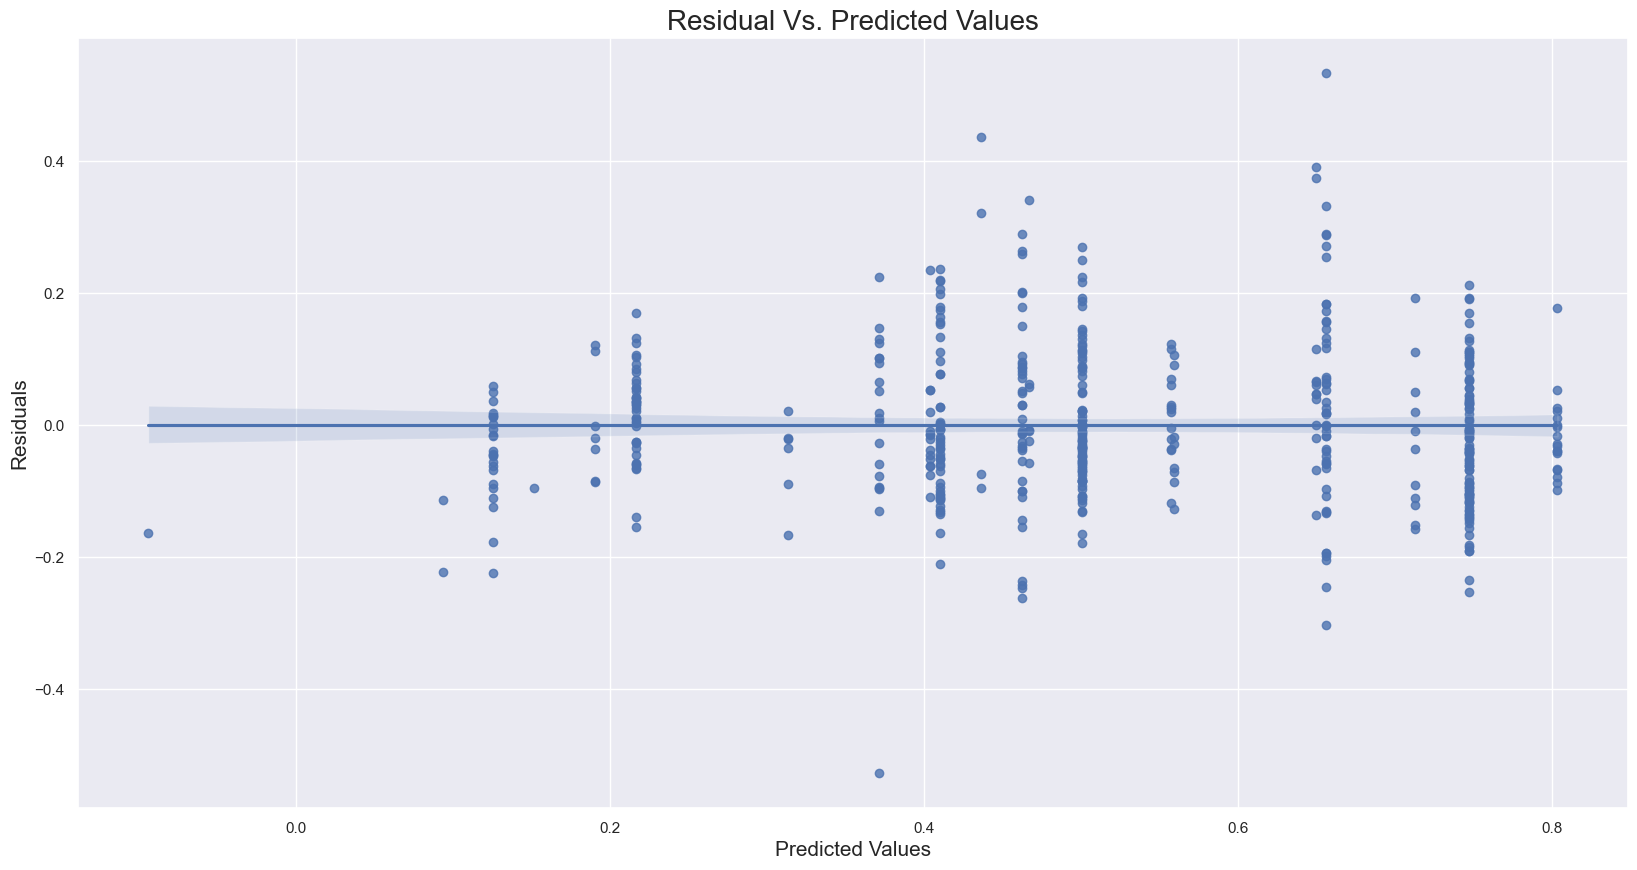

In [89]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train_pred, y=y_train_pred - y_train)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

# Homoscedasticity

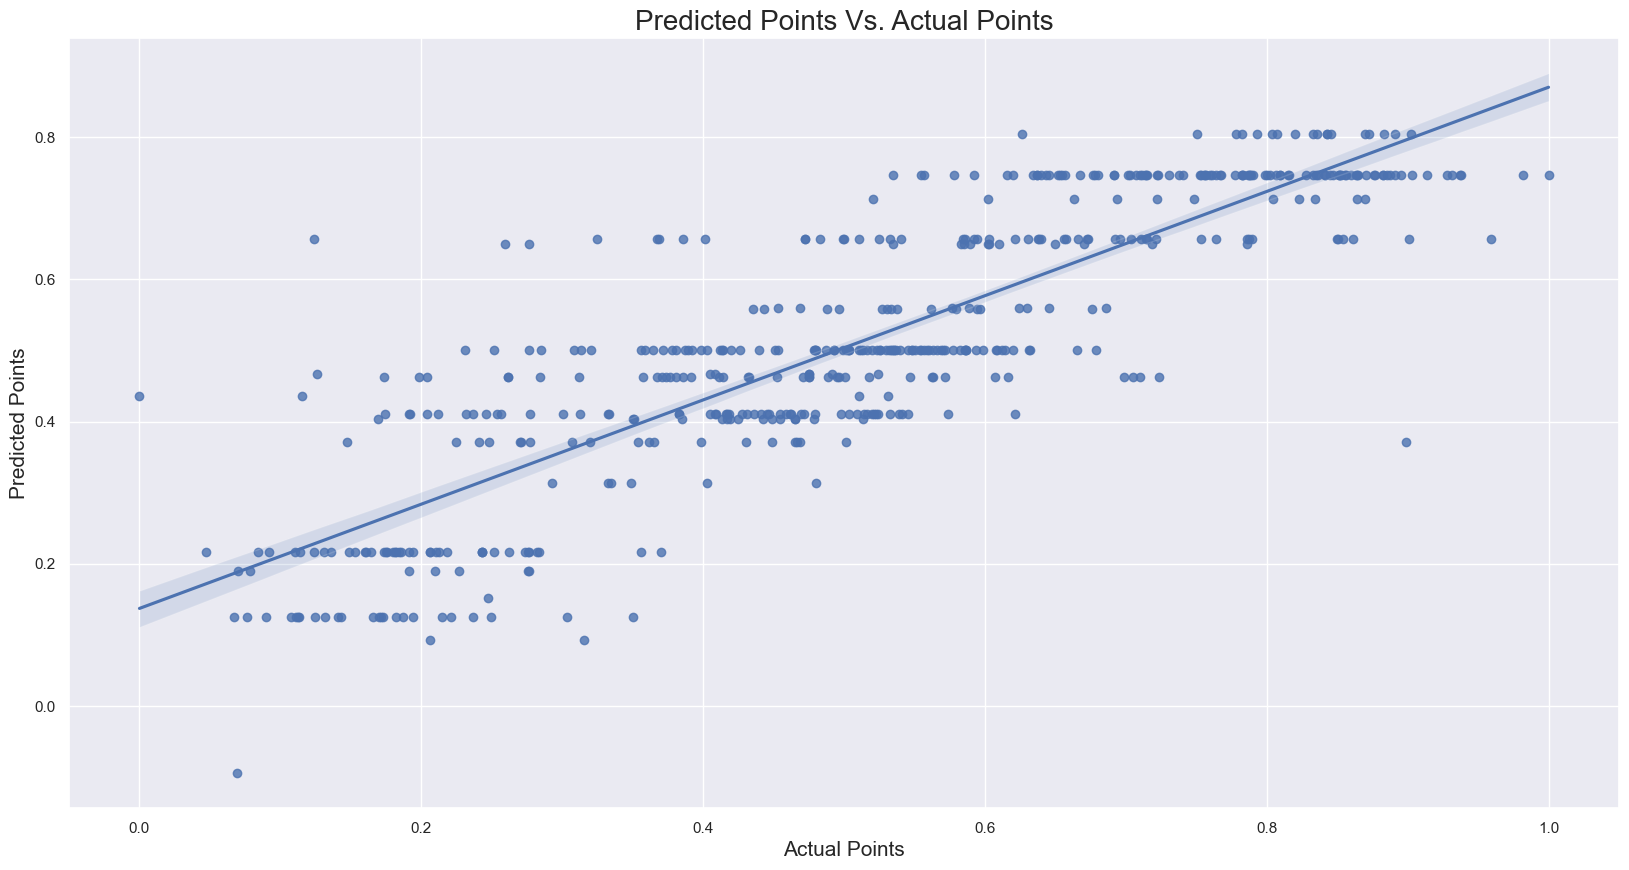

In [90]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## Multicorrelation

In [91]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_final.drop("const",axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
0                         yr  1.39
5              Mist & Cloudy  1.28
1                     spring  1.19
2                     August  1.10
3                   November  1.07
4  Light Snow and Light Rain  1.01


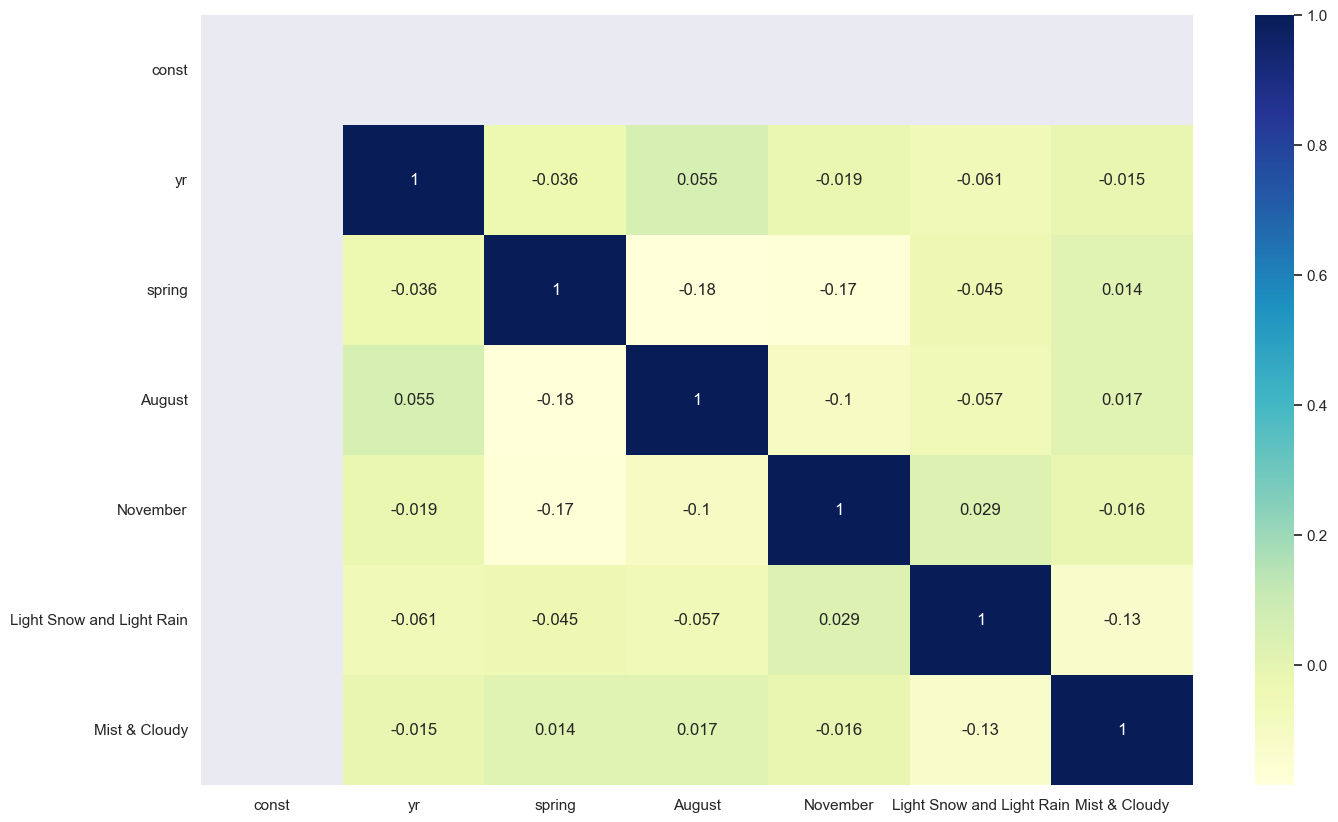

In [92]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_final.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Predictions and Evaluation on the Test Set:

In [93]:

# Applying the scaling on the test sets
X_train_final.columns

Index(['const', 'yr', 'spring', 'August', 'November',
       'Light Snow and Light Rain', 'Mist & Cloudy'],
      dtype='object')

In [94]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [95]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,0,1,0,0,1,0,0


In [96]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# putting target variable 'cnt' in y_test and remaining all variables in X_test

y_test = df_test.pop('cnt')
X_test = df_test

In [98]:
# adding a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednessday,Clear & Few clouds,Light Snow and Light Rain,Mist & Cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,...,0,1,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,...,0,0,0,0,0,0,1,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,...,0,0,0,0,1,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,...,0,0,0,0,0,0,1,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,...,0,0,0,0,1,0,0,1,0,0


In [99]:
# dropping all column which are not in lm model from X_test

X_test_sm = X_test_sm[["yr","spring","August","November", "Light Snow and Light Rain","Mist & Cloudy"]]
X_test_sm.head()

,yr,spring,August,November,Light Snow and Light Rain,Mist & Cloudy
184,0,0,0,0,0,1
535,1,0,0,0,0,0
299,0,0,0,0,0,1
221,0,0,1,0,0,0
152,0,0,0,0,0,0


In [100]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   yr                         219 non-null    int64  
 2   spring                     219 non-null    uint8  
 3   August                     219 non-null    uint8  
 4   November                   219 non-null    uint8  
 5   Light Snow and Light Rain  219 non-null    uint8  
 6   Mist & Cloudy              219 non-null    uint8  
dtypes: float64(1), int64(1), uint8(5)
memory usage: 6.2 KB


In [101]:
X_train_final

,const,yr,spring,August,November,Light Snow and Light Rain,Mist & Cloudy
653,1.0,1,0,0,0,0,0
576,1.0,1,0,0,0,0,0
426,1.0,1,1,0,0,0,1
728,1.0,1,1,0,0,0,0
482,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
526,1.0,1,0,0,0,0,1
578,1.0,1,0,1,0,0,0
53,1.0,0,1,0,0,0,0
350,1.0,0,0,0,0,0,1


In [102]:
X_test_sm

,const,yr,spring,August,November,Light Snow and Light Rain,Mist & Cloudy
184,1.0,0,0,0,0,0,1
535,1.0,1,0,0,0,0,0
299,1.0,0,0,0,0,0,1
221,1.0,0,0,1,0,0,0
152,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
400,1.0,1,1,0,0,0,1
702,1.0,1,0,0,0,0,0
127,1.0,0,0,0,0,0,0
640,1.0,1,0,0,0,0,1


In [103]:
# Making predictions
y_test_pred = lm.predict(X_test_sm)

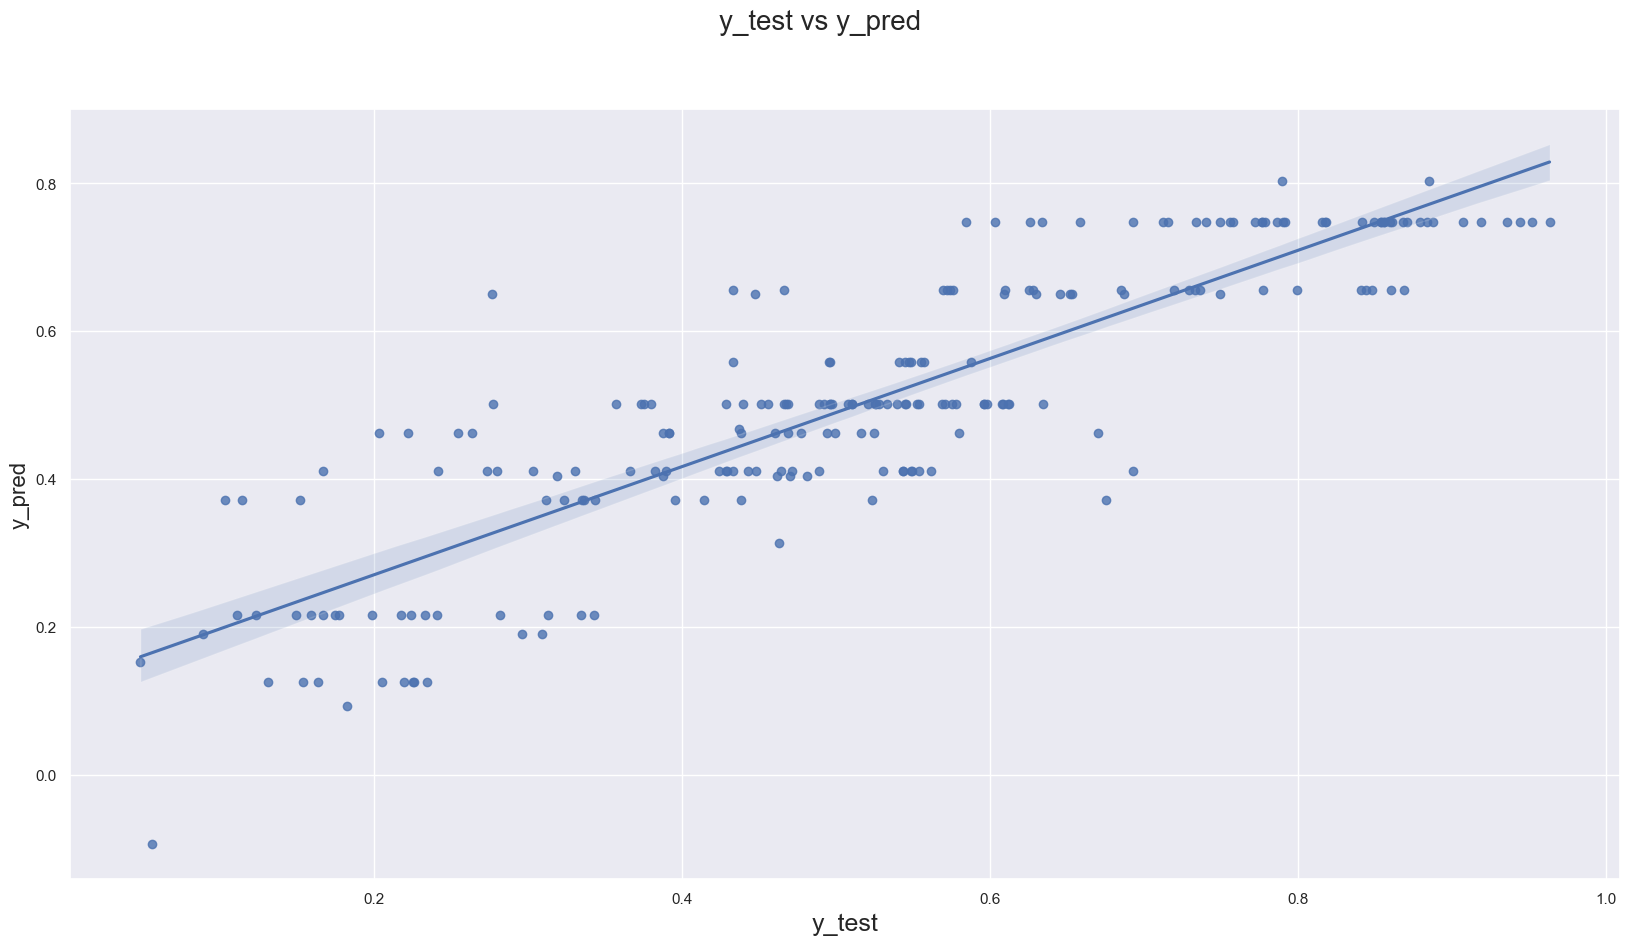

In [104]:
# Plotting y_test and y_pred to understand the spread.
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(y_test,y_test_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()# Y-label

In [105]:
# Evaluate

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7507120502123121

### Thus, for the model with 6 variables, the r-squared on training and test data is about 73.2% and 75.07% respectively. The adjusted r-squared on the train set is about is about 72.9%

We can see that the equation of our best fitted line is:

# Final Model Equation
#### cnt = const * 0.501 + yr * 0.246 + spring * -0.285 + August * 0.057 + November * -0.097 + Light Snow and Light Rain * -0.311 + Mist & Cloudy * -0.091 + 0

### Thank you
#### siddharth parakh